In [4]:
import pandas as pd

# Load the data set
data = pd.read_csv('claims_data.csv')

# Filter the dataset for individuals with BMI greater than 25
overweight_obese = data[data['bmi'] > 25]

# Calculate the proportion
proportion = len(overweight_obese) / len(data) * 100

print(f"Proportion of individuals classified as overweight or obese: {proportion:.2f}%")


Proportion of individuals classified as overweight or obese: 81.54%


In [7]:
import pandas as pd

# Load the data set
data = pd.read_csv('claims_data.csv')

# Calculate the mean and variance of the number of children
mean_children = data['children'].mean()
variance_children = data['children'].var()

print(f"Mean number of children: {mean_children}")
print(f"Variance of number of children: {variance_children}")


Mean number of children: 1.0949177877429
Variance of number of children: 1.4532127456668944


In [8]:
import pandas as pd
import scipy.stats as stats

# Load the data set
data = pd.read_csv('claims_data.csv')

# Calculate the mean and standard deviation of age
mean_age = data['age'].mean()
std_age = data['age'].std()

# Calculate the z-score for age 60
z_score = (60 - mean_age) / std_age

# Calculate the proportion of individuals expected to be 60 or older
proportion_60_or_older = 1 - stats.norm.cdf(z_score)

# Calculate the expected number of individuals aged 60 or older
expected_number_60_or_older = proportion_60_or_older * len(data)

# Round to the nearest integer
expected_number_60_or_older = round(expected_number_60_or_older)

# Calculate the actual number of individuals aged 60 or older
actual_number_60_or_older = len(data[data['age'] >= 60])

print(f"Expected number of individuals aged 60 or older: {expected_number_60_or_older}")
print(f"Actual number of individuals aged 60 or older: {actual_number_60_or_older}")

# Compare the expected and actual numbers
difference = actual_number_60_or_older - expected_number_60_or_older

if difference == 0:
    print("The two are exactly equal!")
elif difference == 7:
    print("There are 7 more individuals 60 or older than the normal distribution would suggest.")
elif difference == -7:
    print("There are 7 fewer individuals 60 or older than the normal distribution would suggest.")
elif difference == 21:
    print("There are 21 more individuals 60 or older than the normal distribution would suggest.")
elif difference == -21:
    print("There are 21 fewer individuals 60 or older than the normal distribution would suggest.")
else:
    print(f"There is a difference of {difference} individuals.")


Expected number of individuals aged 60 or older: 93
Actual number of individuals aged 60 or older: 114
There are 21 more individuals 60 or older than the normal distribution would suggest.


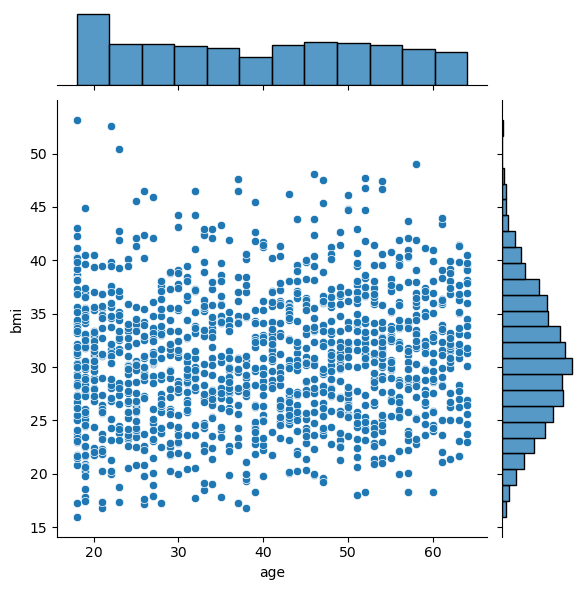

Correlation coefficient: 0.11
P-value: 6.19e-05


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load the data set
data = pd.read_csv('claims_data.csv')

# Create a joint plot
sns.jointplot(x='age', y='bmi', data=data, kind='scatter')

# Calculate the correlation coefficient
correlation_coefficient, p_value = pearsonr(data['age'], data['bmi'])

# Display the plot
plt.show()

print(f"Correlation coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.2e}")


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the data set
data = pd.read_csv('claims_data.csv')

# Convert the target variable to binary (1 for claim, 0 for no claim)
data['insurance_claim'] = data['insurance_claim'].apply(lambda x: 1 if x == 'yes' else 0)

# Drop the 'claim_amount' column
data = data.drop(columns=['claim_amount'])

# Create dummy variables for categorical features, dropping the first category
data = pd.get_dummies(data, drop_first=True)

# Split the data into training and test sets
X = data.drop(columns=['insurance_claim'])
y = data['insurance_claim']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Proportion of claim indicators correctly predicted: {accuracy:.2%}")


Proportion of claim indicators correctly predicted: 84.84%


/home/mite/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the data
claims_data = pd.read_csv('claims_data.csv')

# Specify categorical columns for one-hot encoding
categorical_cols = ['sex', 'smoker', 'region']
claims_data = pd.get_dummies(claims_data, columns=categorical_cols, drop_first=True)

# Convert 'insurance_claim' to numerical (0 and 1)
claims_data['insurance_claim'] = claims_data['insurance_claim'].map({'yes': 1, 'no': 0})

# Convert boolean columns to integers
bool_cols = ['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
claims_data[bool_cols] = claims_data[bool_cols].astype(int)

# Ensure all data is numeric
claims_data = claims_data.apply(pd.to_numeric, errors='coerce')

# Define features (X) and target (y)
X = claims_data.drop('insurance_claim', axis=1)
y = claims_data['insurance_claim']

# Add a constant to the features matrix
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

# Drop features with high VIF values (e.g., VIF > 10)
X = X.drop(columns=['claim_amount'])  # Example: dropping 'claim_amount' if it has high VIF

# Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Print the results summary
print(result.summary())


             feature         VIF
0              const  146.766125
1                age    1.279365
2                bmi    2.916114
3              steps    2.417610
4           children    1.102904
5       claim_amount    4.353539
6           sex_male    1.009785
7         smoker_yes    4.247240
8   region_northwest    1.522320
9   region_southeast    1.673517
10  region_southwest    1.533533
Optimization terminated successfully.
         Current function value: 0.361971
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        insurance_claim   No. Observations:                 1070
Model:                          Logit   Df Residuals:                     1060
Method:                           MLE   Df Model:                            9
Date:                Fri, 02 Aug 2024   Pseudo R-squ.:                  0.4676
Time:                        00:08:52   Log-Likelihood:                -387.31
converged:                  

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Create a Random Forest Classifier with regularization
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=101, max_depth=10, min_samples_split=10, min_samples_leaf=5)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the data
claims_data = pd.read_csv('claims_data.csv')

# One-hot encode categorical columns and convert 'insurance_claim' to numerical
categorical_cols = ['sex', 'smoker', 'region']
claims_data = pd.get_dummies(claims_data, columns=categorical_cols, drop_first=True)
claims_data['insurance_claim'] = claims_data['insurance_claim'].map({'yes': 1, 'no': 0})

# Define features (X) and target (y)
X = claims_data.drop('insurance_claim', axis=1)
y = claims_data['insurance_claim']

# Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVM classifiers with different kernels
svm_radial = SVC(kernel='rbf')  # Radial kernel
svm_sigmoid = SVC(kernel='sigmoid') # Sigmoid kernel
svm_linear = SVC(kernel='linear')  # Linear kernel

# Fit the models to the training data
svm_radial.fit(X_train, y_train)
svm_sigmoid.fit(X_train, y_train)
svm_linear.fit(X_train, y_train)

# Make predictions on the test data
y_pred_radial = svm_radial.predict(X_test)
y_pred_sigmoid = svm_sigmoid.predict(X_test)
y_pred_linear = svm_linear.predict(X_test)

# Calculate accuracies
accuracy_radial = accuracy_score(y_test, y_pred_radial)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

print("Accuracy (Radial):", accuracy_radial)
print("Accuracy (Sigmoid):", accuracy_sigmoid)
print("Accuracy (Linear):", accuracy_linear)


Accuracy (Radial): 0.9925373134328358
Accuracy (Sigmoid): 0.9850746268656716
Accuracy (Linear): 1.0
